# *Manufacturing Root Cause (Group 3)*

Project developers:
- Amine Amri
- Julia Graham
- Sebastian Anusch
- Simone Assirelli 

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Loading the data

In [2]:
url_defects = 'https://dl.dropboxusercontent.com/scl/fi/j3xred1cqmicuxui4kj6m/RC_DEFECTS_clean.csv?rlkey=gumwpqnsfvdyjdx5doi4i7zxb&dl=1'
url_production = 'https://dl.dropboxusercontent.com/scl/fi/baekmodofe2sn64qhrcur/RC_PRODUCTION_clean.csv?rlkey=uw7r9vgblez57cbnwsf2c3vmd&dl=1'
df_def = pd.read_csv(url_defects)
df_prod = pd.read_csv(url_production)

## 1. Exploring the data

In [3]:
print(df_def.shape)
df_def.head()

(617, 10)


,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0.0,599.0,2019-03-01,0,0,1,0,0,0
1,389523,600.0,1457.0,2019-03-01,0,1,1,0,0,0
2,389528,0.0,1399.0,2019-03-01,0,0,1,0,0,0
3,389528,1400.0,1539.0,2019-03-01,0,0,1,0,1,0
4,389712,0.0,1374.0,2019-03-01,0,0,1,0,0,0


In [4]:
print(df_prod.shape)
df_prod.head()

(299384, 110)


,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Columns of production dataframe
prod_columns = list(df_prod.columns)
print(prod_columns) 

['COIL', 'DATE', 'MT', 'TIME_START_PROCESS', 'SPEED_PROCESS', 'TEMP_Z1', 'TEMP_Z2', 'TEMP_Z3', 'TEMP_Z4', 'TEMP_Z5', 'TEMP_Z6', 'PYRO_1_PRECHMBR', 'PYRO_2_FRST_3_ZONE', 'PYRO_3_LST_3_ZONE', 'LS_OVEN', 'LASER_FRN_1', 'LASER_FRN_2', 'LASER_FRN_3', 'LASER_FRN_4', 'LASER_FRN_5', 'LASER_FRN_6', 'LASER_FRN_7', 'LASER_FRN_8', 'LASER_FRN_9', 'AIR_CH4_1', 'AIR_CH4_2', 'AIR_CH4_3', 'AIR_CH4_4', 'AIR_CH4_5', 'AIR_CH4_6', 'AIR_Z1_1', 'AIR_Z1_2', 'AIR_Z2_1', 'AIR_Z2_2', 'AIR_Z3_1', 'AIR_Z3_2', 'AIR_Z4_1', 'AIR_Z4_2', 'AIR_Z5_1', 'AIR_Z5_2', 'AIR_Z6_1', 'AIR_Z6_2', 'GAS_Z1_1', 'GAS_Z1_2', 'GAS_Z2_1', 'GAS_Z2_2', 'GAS_Z3_1', 'GAS_Z3_2', 'GAS_Z4_1', 'GAS_Z4_2', 'GAS_Z5_1', 'GAS_Z5_2', 'GAS_Z6_1', 'GAS_Z6_2', 'FRN_PHF_PRESSURE', 'FRN_FURNACE_PRESSURE', 'TIRO_FORNO', 'PRES_ZONA1_MEASURED', 'PRES_ZONA1_SET', 'PRES_ZONA2_MEASURED', 'PRES_ZONA2_SET', 'PRES_ZONA3_MEASURED', 'PRES_ZONA3_SET', 'EXT_1', 'EXT_2', 'VENT_1', 'VENT_2', 'VENT_3', 'VENT_4', 'VENT_5', 'COOL_1A', 'COOL_1B', 'COOL_2A', 'COOL_2B', 'COOL

In [27]:
df_prod.describe()

,COIL,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
count,2.993840e+05,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,...,283737.000000,283737.000000,283737.000000,283737.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000
mean,4.210808e+05,1013.750454,36.030174,1236.378668,1257.600788,1266.031784,1279.476562,1293.618170,1281.422092,802.675699,...,526.644078,18.292673,18.344328,3186.598116,39.900765,689.840763,3610.710095,0.532809,0.164599,0.169975
std,2.484114e+05,874.832131,11.243607,87.092407,87.833443,87.717798,85.313536,88.576110,84.233837,38.910802,...,34.108621,2.699142,2.794101,1306.570596,17.267686,279.623230,982.734142,0.232301,0.040681,0.038671
min,2.406270e+05,0.000000,-2.304028,79.722742,74.225453,74.198610,77.426415,78.567278,79.205925,549.382500,...,-3.665034,0.000000,0.000000,856.680000,-1.809788,-496.040375,-48.285825,0.000000,-0.011853,-0.016642
25%,3.947170e+05,378.000000,28.063851,1236.605625,1259.813250,1271.021625,1260.090000,1261.445625,1271.056781,795.292844,...,529.919898,16.875000,16.875000,2333.722500,28.351013,496.627351,2946.052969,0.470936,0.134999,0.135002
50%,4.037420e+05,812.000000,33.685521,1261.473750,1272.760476,1278.000540,1286.188125,1317.151607,1293.406875,811.525114,...,530.125500,18.000000,18.000000,2901.962812,37.656312,662.102578,3790.602141,0.559548,0.135037,0.161994
75%,4.146100e+05,1400.000000,44.908965,1270.924798,1293.924375,1303.419825,1316.148750,1333.189687,1313.704765,823.938673,...,530.315100,20.248013,20.250000,4021.551000,49.828513,837.825196,4217.453156,0.572413,0.188993,0.189022
max,6.838679e+06,7273.000000,67.408785,1322.268750,1344.982500,1357.508250,1348.341750,1367.288438,1362.536250,931.753875,...,541.123650,31.405500,32.747692,9073.901250,90.010696,2933.876250,6257.584687,7.342893,0.679614,0.324028


## 2. Merging procedure

In [20]:
# Create a new DataFrame to hold the merged data
merged_df = df_prod.copy()

# Initialize defect columns in the merged DataFrame with default values (e.g., NaN or 0)
for i in range(1, 7):
    defect_col = f'DIF_TIPO_{i}'
    merged_df[defect_col] = pd.NA  # or use np.nan, or 0, depending on how you want to represent no defect

# Function to apply the defects to the production DataFrame
# This function is designed to take a row from the defect DataFrame (df_def), 
# find the corresponding rows in df_prod based on coil ID and meter range, and then update 
# these rows in merged_df with the defect information.
def apply_defects(row, production, merged_df):
    coil_id = row['COIL']
    mt_from = row['MT_FROM']
    mt_to = row['MT_TO']
    defect_info = row[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']]
    
    # Filter production for the current coil and meter range
    mask = (production['COIL'] == coil_id) & (production['MT'] >= mt_from) & (production['MT'] <= mt_to) # filter
    production_subset = production.loc[mask]
    
    # Update the merged DataFrame with defect information
    for index in production_subset.index:
        merged_df.loc[index, defect_info.index] = defect_info.values

# The following line applies the 'apply_defects' function to each row of 'df_def'.
df_def.apply(lambda row: apply_defects(row, df_prod, merged_df), axis=1)

# Now merged_production contains the merged information with defects applied to the relevant meter ranges.

0      None
1      None
2      None
3      None
4      None
       ... 
612    None
613    None
614    None
615    None
616    None
Length: 617, dtype: object

After this process, merged_df contains the production data with defect information correctly applied. Each row in 'merged_df' represents production data, and if there were any defects associated with the particular meter range of a coil, this information is now included in the corresponding rows.

In [21]:
merged_df.shape

(299384, 116)

In [29]:
# # Convert MT_FROM and MT_TO to integers, handling NaN and float values
# df_def['MT_FROM'] = df_def['MT_FROM'].fillna(0).astype(int)
# df_def['MT_TO'] = df_def['MT_TO'].fillna(0).astype(int)

# # Create a new column in defects to facilitate the merge
# df_def['MT'] = df_def.apply(lambda x: list(range(x['MT_FROM'], x['MT_TO']+1)), axis=1)

# # Explode the 'MT' column to create a row for each meter within the defect range.
# # transforms each list in the MT column into separate rows, essentially creating a row 
# #for each meter point within the range of a defect
# defects_exploded = df_def.explode('MT')

# # Perform the merge on 'COIL' and 'MT'
# merged_df = pd.merge(df_prod, defects_exploded, on=['COIL', 'MT', 'DATE'], how='left', suffixes=('', '_defects'))

# # This part of the code forward-fills defect information within each COIL group.
# # It ensures that once a defect starts, the relevant defect information continues 
# # for all subsequent meters until the defect ends.
# # This is important because a defect may span multiple meters, and the information needs to 
# # be replicated across all affected rows.
# for col in ['DATE', 'DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']:
#     # Forward-fill the defect information for each COIL group
#     merged_df[col] = merged_df.groupby('COIL')[col].ffill()

# # Now merged_df should have the defect information and date in the correct rows

# # Final data shape 
# print(merged_df.shape)

Downloading the merged data in a csv format (in case you want to visualize it on Excel) \
P.S. Do not run this if you don't want to download it!

In [8]:
# ! pip install openpyxl
# merged_df.to_excel('merged_data.xlsx', index=False, engine='openpyxl')

## 3. Dealing with missing Values

Question: Are there missing values in the ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6'] columns?

In [23]:
merged_df[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    192645
DIF_TIPO_2    192645
DIF_TIPO_3    192645
DIF_TIPO_4    192645
DIF_TIPO_5    192645
DIF_TIPO_6    192645
dtype: int64

Answer: Yes. Therefore, we need to convern Null values to 0s for observations that have no defects

In [24]:
# List of defect columns - replace or extend this with your actual defect column names
defect_columns = ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']

# Replace NaN values with 0 in defect columns
for col in defect_columns:
    merged_df[col] = merged_df[col].fillna(0)

merged_df[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    0
DIF_TIPO_2    0
DIF_TIPO_3    0
DIF_TIPO_4    0
DIF_TIPO_5    0
DIF_TIPO_6    0
dtype: int64

In [25]:
# Checking for overall missing values
merged_df.isna().sum().sum()

908899

Let's visualize missing values with a bar chart

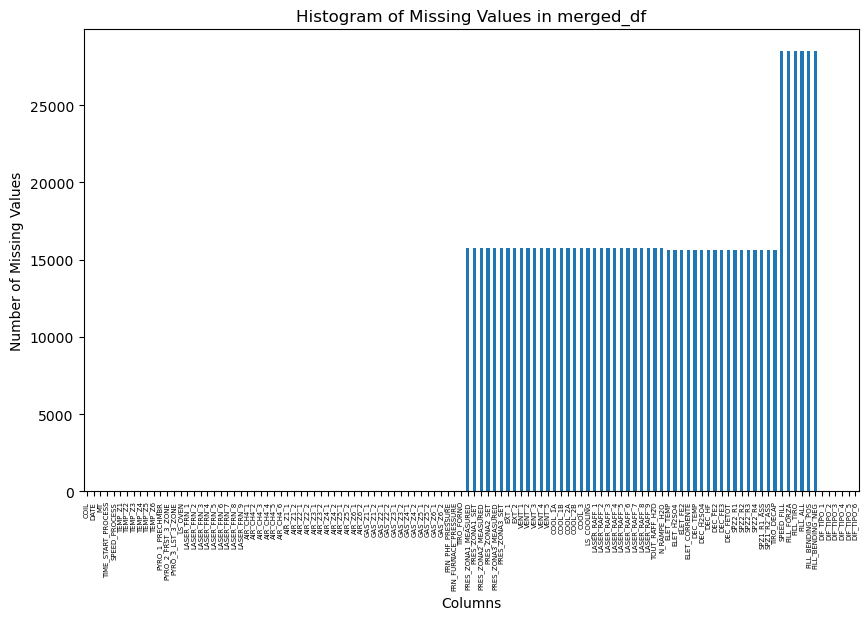

In [26]:
missing_values = merged_df.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values in merged_df')
plt.xticks(rotation=90, fontsize = 5)
plt.show()

How should we deal with this large number of null values?

## 4. Principal Component Analysis

[0.30365738 0.39404638 0.46415341 0.50412252 0.53586657 0.56584863
 0.59271406 0.6183153  0.63979133 0.66024451 0.67841879 0.69479225
 0.7105594  0.72447616 0.73773318 0.75063916 0.76241224 0.7731456
 0.78294513 0.79236895 0.80168224 0.81066716 0.81940252 0.82812338
 0.83665183 0.84500855 0.85276633 0.86044105 0.86804982 0.87532265
 0.88236896 0.88910225 0.89562528 0.90200244 0.90812728 0.91378358
 0.91934559 0.92455068 0.92957351 0.93430533 0.93882987 0.94306664
 0.94713037 0.95096865 0.95454578 0.95784275 0.96099756 0.96404431
 0.96697268 0.96975571 0.9721801  0.97447808 0.97674443 0.97893185
 0.98082706 0.98253549 0.98416902 0.98571095 0.98714611 0.98842256
 0.98959152 0.99064909 0.99167305 0.99266386 0.99349977 0.99429241
 0.99501664 0.99572483 0.9964185  0.99704327 0.99748843 0.99791041
 0.9982824  0.99854874 0.99878923 0.99901337 0.99916937 0.99926994
 0.99936084 0.99944339 0.99952226 0.99959235 0.99965692 0.99971118
 0.99976112 0.999798   0.99982887 0.99985796 0.99988241 0.99990

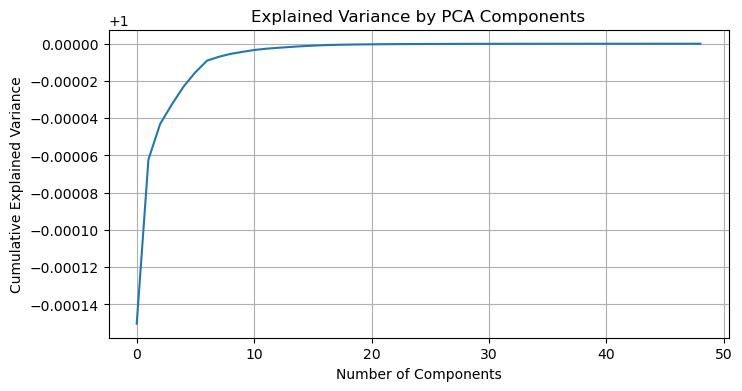

In [30]:

from sklearn.impute import SimpleImputer
# # Dropping non-numeric columns if any
numeric_data = merged_df.select_dtypes(include=[np.number])

# # Replace NaN values with the mean of each column
numeric_data_filled = numeric_data.fillna(numeric_data.mean())
# For replacing missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
# Assuming numeric_data is your dataset with missing values
imputer.fit(numeric_data)
numeric_data_transformed = imputer.transform(numeric_data)

# create a PCA 

scaler = StandardScaler() 
data_std = scaler.fit_transform(numeric_data_transformed)
pca = PCA()
pca.fit(data_std)
print(pca.explained_variance_ratio_.cumsum())

# # Applying PCA
pca = PCA(n_components=49)  # This retains 95% of the variance
principal_components = pca.fit_transform(numeric_data_transformed)

# # Transform data to DataFrame
principal_df = pd.DataFrame(data=principal_components)

# # Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

## 5. 